<a href="https://colab.research.google.com/github/PunitRaveendran/ACM/blob/main/Phase-4%20SVD%20%2B%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zip file extracted successfully.
Loaded documents: 20
Raw TF-IDF shape: (20, 5000)
After SVD shape: (20, 2)


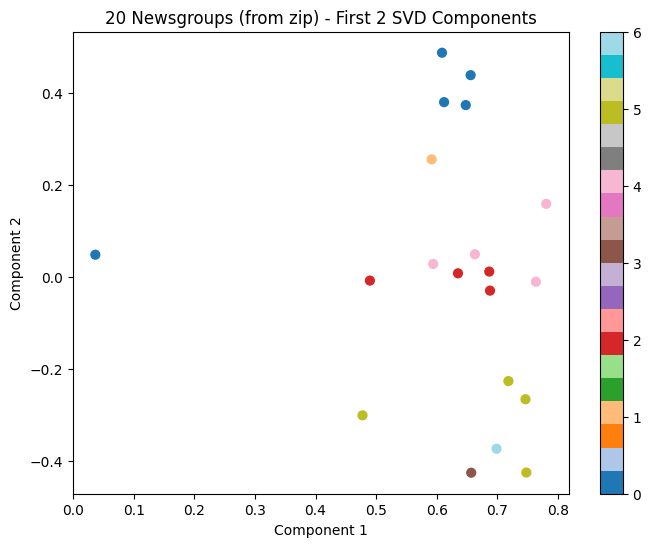

Silhouette Score with KMeans (k=5): 0.08192973669350687


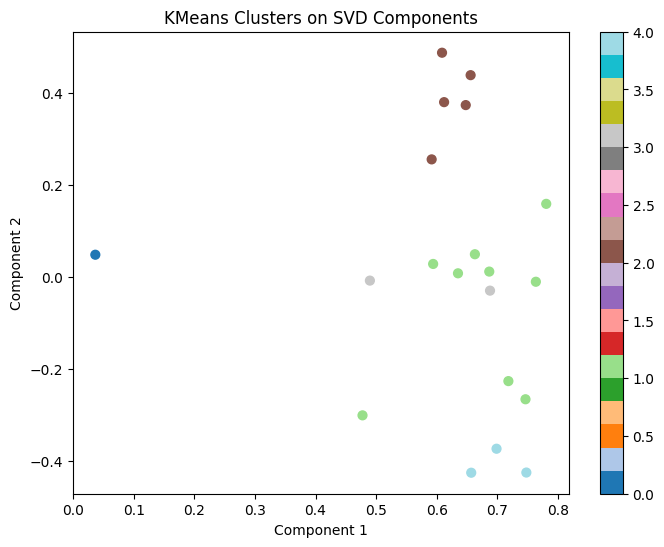

'\n#1.Learnt about how to etract a ZIP file, what is TF-IDF and then dimensionally reduce it by svd plot them,\nthen perform the cluster process again nd plot them\n2.The confusion matrix didnt work im not sure how to do it or what is being expected\n'

In [5]:
import os
import zipfile
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Extract the zip file
zip_path = "/content/archive.zip"
extract_dir = "/content/archive_extracted"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Check if the zip file exists before attempting to open it
if not os.path.exists(zip_path):
    print(f"Error: Zip file not found at {zip_path}")
else:
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print("Zip file extracted successfully.")

        # 2. Load all text data from the extracted directory
        data_dir = extract_dir
        texts = []
        labels_true = []
        for file_name in os.listdir(data_dir):
            if file_name.endswith(".txt"):
                with open(os.path.join(data_dir, file_name), "r", encoding="utf-8", errors="ignore") as f:
                    content = f.read()
                    texts.append(content)
                    labels_true.append(file_name.split('.')[0])  # category label from filename

        print("Loaded documents:", len(texts))

        if len(texts) > 0:
            # 3. TF-IDF
            vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
            X_tfidf = vectorizer.fit_transform(texts)
            print("Raw TF-IDF shape:", X_tfidf.shape)

            # 4. SVD for dimensionality reduction
            svd = TruncatedSVD(n_components=2, random_state=42)
            X_svd = svd.fit_transform(X_tfidf)
            print("After SVD shape:", X_svd.shape)

            # 5. Plot first two components
            plt.figure(figsize=(8,6))
            # map string labels to numbers for color
            unique_labels = list(set(labels_true))
            label_to_idx = {lbl:i for i,lbl in enumerate(unique_labels)}
            colors = [label_to_idx[lbl] for lbl in labels_true]

            plt.scatter(X_svd[:,0], X_svd[:,1], c=colors, cmap='tab20', s=40)
            plt.title("20 Newsgroups (from zip) - First 2 SVD Components")
            plt.xlabel("Component 1")
            plt.ylabel("Component 2")
            plt.colorbar()
            plt.show()

            # 6. (Optional) Clustering with KMeans
            # Check if there are enough samples for clustering
            if X_tfidf.shape[0] >= 5: # KMeans requires at least n_clusters samples
                kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
                pred_labels = kmeans.fit_predict(X_tfidf)
                sil_score = silhouette_score(X_tfidf, pred_labels)
                print("Silhouette Score with KMeans (k=5):", sil_score)

                # Plot clusters
                plt.figure(figsize=(8,6))
                plt.scatter(X_svd[:,0], X_svd[:,1], c=pred_labels, cmap='tab20', s=40)
                plt.title("KMeans Clusters on SVD Components")
                plt.xlabel("Component 1")
                plt.ylabel("Component 2")
                plt.colorbar()
                plt.show()
            else:
                print("Not enough data points to perform KMeans clustering with 5 clusters.")

        else:
            print("No text files found in the extracted directory.")

    except zipfile.BadZipFile:
        print(f"Error: The file at {zip_path} is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


'''
tfidf is highly dimensional soit makes visualization hard or ineffiecient in many models
SVA(Singular value decomposition) or PCA reduced the dimensionality by projecting the data in a dense low-dimensional space so that the majority or variance or structure is restored
this also speeds up learning; By applying cluster on reduced data we can reveal natural grouping thereby we get valueable insights without labels !!
'''

#Summary
'''
#1.Learnt about how to etract a ZIP file, what is TF-IDF and then dimensionally reduce it by svd plot them,
then perform the cluster process again nd plot them
2.The confusion matrix didnt work im not sure how to do it or what is being expected
'''